# Data Import and Observation

In [83]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
data = pd.read_csv("Android_Permission.csv")
data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),...,System tools : send sticky broadcast (S),System tools : set preferred applications (S),System tools : set time zone (D),System tools : set wallpaper (S),System tools : set wallpaper size hints (S),System tools : write Access Point Name settings (D),System tools : write subscribed feeds (D),System tools : write sync settings (D),Your accounts : Blogger (D),Your accounts : Google App Engine (D),Your accounts : Google Docs (D),Your accounts : Google Finance (D),Your accounts : Google Maps (D),Your accounts : Google Spreadsheets (D),Your accounts : Google Voice (D),Your accounts : Google mail (D),Your accounts : Picasa Web Albums (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access all Google services (S),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D

In [11]:
data.columns[9:]

Index(['Safe permissions count', 'Default : Access DRM content. (S)',
       'Default : Access Email provider data (S)',
       'Default : Access all system downloads (S)',
       'Default : Access download manager. (S)',
       'Default : Advanced download manager functions. (S)',
       'Default : Audio File Access (S)', 'Default : Install DRM content. (S)',
       'Default : Modify Google service configuration (S)',
       'Default : Modify Google settings (S)',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : wri

In [122]:
data.Class.value_counts()

1    20000
0     9999
Name: Class, dtype: int64

In [160]:
data.isna().sum()

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64

In [161]:
data.dropna(inplace=True)

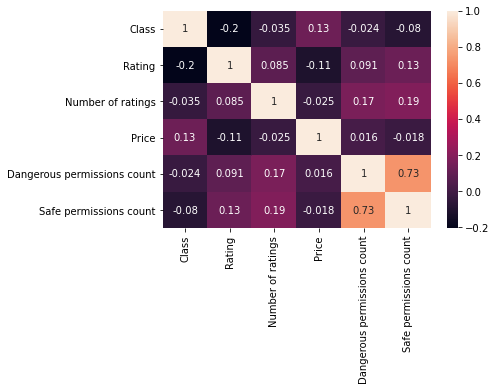

In [112]:
sns.heatmap(pd.concat([data.iloc[:,[183]],  data.iloc[:,:10]],axis=1).corr(), annot=True);

In [113]:
dangerous_cols = data.columns[data.columns.str.contains("\(D\)")].tolist()
safe_cols = data.columns[data.columns.str.contains("\(S\)")].tolist()

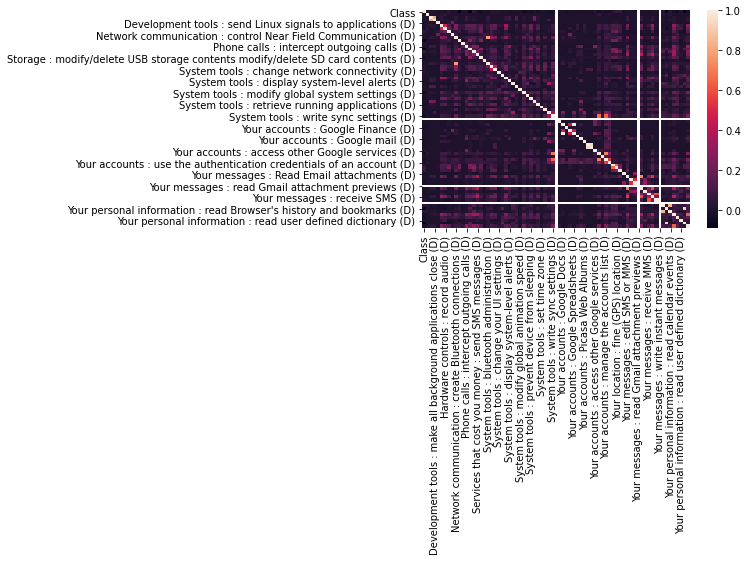

In [114]:
sns.heatmap(pd.concat([data.iloc[:,[183]],  data.loc[:,dangerous_cols]],axis=1).corr())

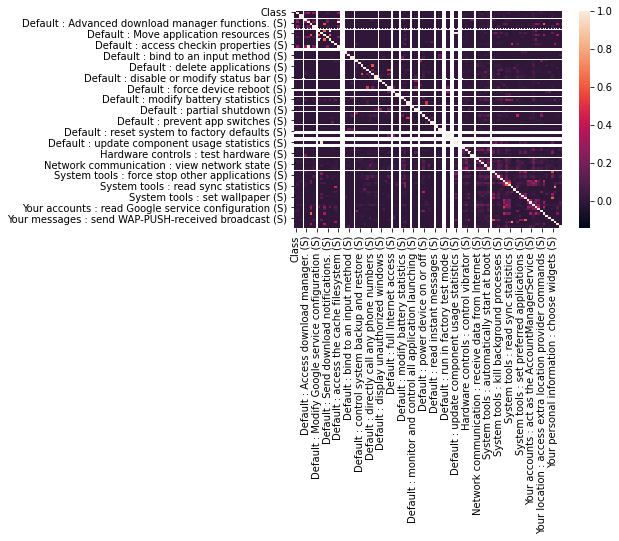

In [115]:
sns.heatmap(pd.concat([data.iloc[:,[183]],  data.loc[:,safe_cols]],axis=1).corr())

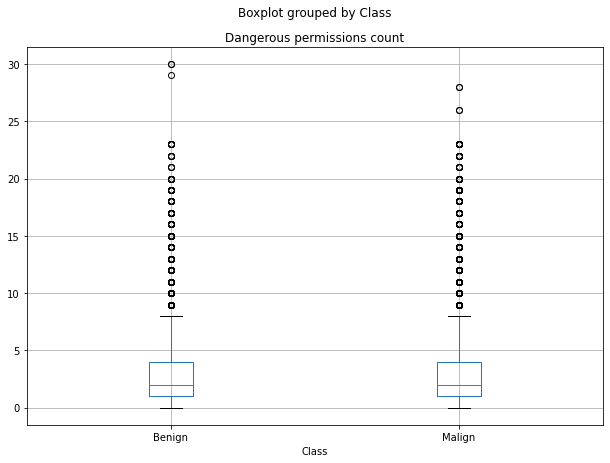

In [116]:
data.boxplot(column='Dangerous permissions count',by="Class",figsize=(10,7))
plt.xticks(ticks = [1,2],labels = ["Benign", "Malign"]);

In [162]:
data.drop(["Package", "Description", "Related apps"],axis=1, inplace=True)


In [176]:

cat = data.Category.value_counts()

cat = cat[cat>700]
data = data[~data["Category"].isin(cat)]

data = pd.get_dummies(data=data,prefix="", columns=["Category"], drop_first=True)


In [177]:
data = data.drop_duplicates(subset="App", keep="first")

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),...,Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class,_Books & Reference,_Brain & Puzzle,_Business,_Cards & Casino,_Casual,

In [164]:
data = data[~data.App.str.contains("[?]")]

In [165]:
data.App.value_counts()

Indian Railway Schedule           1
Toothbrush Helper (Lite)          1
3D Zoo                            1
HTTP Query Builder                1
MacDroid Translator               1
                                 ..
Self-Shooting Free                1
Raiffeisen Smart Mobile           1
Old Spice Voicemail Soundboard    1
1200+ Dumb Laws US                1
Weight Tracker                    1
Name: App, Length: 21420, dtype: int64

In [166]:
data.set_index(["App"], inplace=True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, Canada Post Corporation to Brain Ball Game
Columns: 208 entries, Rating to _Weather
dtypes: float64(3), int64(176), uint8(29)
memory usage: 30.0+ MB


In [243]:
from sklearn.model_selection import train_test_split

X = data.drop(["Class"],axis=1)
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)


In [257]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


fs = SelectKBest(score_func=mutual_info_classif, k=50)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

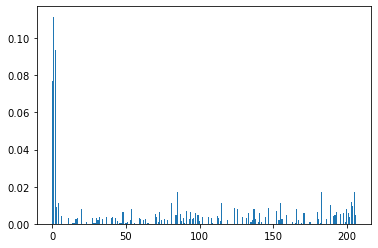

In [247]:
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# np.sort(fs.scores_)[::-1] 
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [245]:
pd.DataFrame(data=zip(fs.scores_,fs.get_support()), index=X.columns.tolist(), columns=["score", "support"]).sort_values(by="score", ascending=False)[:51]

,score,support
Number of ratings,0.111563,True
Price,0.093680,True
Rating,0.076786,True
_Travel & Local,0.017332,True
_Comics,0.016942,True
Network communication : view network state (S),0.016902,True
_Tools,0.011820,True
Your messages : modify Gmail (D),0.011357,True
Network communication : full Internet access (D),0.011183,True
System tools : read/write to resources owned by diag (S),0.011112,True


# Modelling

In [248]:
feature_columns = [X.columns[i] for i in range(len(fs.get_support())) if fs.get_support()[i]]

In [273]:
feature_columns

['Rating',
 'Number of ratings',
 'Price',
 'Dangerous permissions count',
 'Safe permissions count',
 'Default : Access Email provider data (S)',
 'Default : access the cache filesystem (S)',
 'Default : enable or disable application components (S)',
 'Default : monitor and control all application launching (S)',
 'Default : prevent app switches (S)',
 'Development tools : send Linux signals to applications (D)',
 'Hardware controls : control vibrator (S)',
 'Network communication : full Internet access (D)',
 'Network communication : view Wi-Fi state (S)',
 'Network communication : view network state (S)',
 'Phone calls : modify phone state (S)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : bluetooth administration (D)',
 'System tools : change network connectivity (D)',
 'System tools : delete all application cache data (D)',
 'System tools : expand/collapse status bar (S)',
 'System tools : read subscribed feeds (S)',
 'System

In [274]:
len(X_test_fs[0])

50

In [252]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_fs, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [253]:
predict_train = rf1.predict(X_train_fs)
predict_test = rf1.predict(X_test_fs)


print(f"Training Accuracy: {metrics.accuracy_score(y_train, predict_train)}")
print(f"Testing Accuracy: {metrics.accuracy_score(y_test, predict_test)}")

Training Accuracy: 0.9905911082381671
Testing Accuracy: 0.8029878618113913


**For the normal models with 79-85% accuracy, feature selection boosts the chances by removing negatively affecting columns**

# Saving Files

In [259]:
import joblib

with open("model.joblib", 'wb') as model:
    joblib.dump(rf1, model, compress=1)

In [261]:
with open("features.joblib", 'wb') as ft:
    joblib.dump(feature_columns, ft, compress=1)